# HW4_least_squares_regression_1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import datetime as dt

np.random.seed(10)

## 1) Ordinary Least Squares (OLS)
### Extracting The Dataset
We extract the historical data for Microsoft stock price.

In [2]:
Ticker = 'MSFT'
Interval = '1d'
Start = dt.datetime(2021, 1, 1)
End = dt.datetime(2022, 1, 1)

data_full = yf.download(tickers=Ticker, interval=Interval, start=Start, end=End)

[*********************100%***********************]  1 of 1 completed


Looking at the data:

In [3]:
data_full.head(5) 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,214.479111,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,214.686020,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,209.119354,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,215.070267,27694500
2021-01-08,218.679993,220.580002,217.029999,219.619995,216.380630,22956200


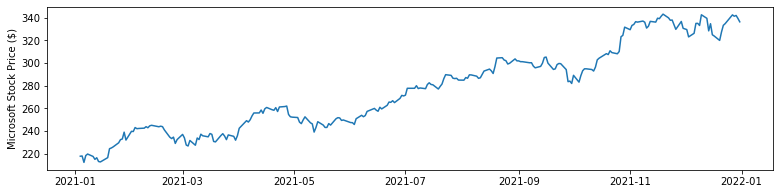

In [4]:
# plotting the Close price
plt.figure(figsize=(13,3))
plt.plot(data_full.Close)
plt.ylabel('Microsoft Stock Price ($)')
plt.show()

### OLS Linear
We use the 'Close' price for modeling:

In [5]:
data = pd.DataFrame(data_full['Close']['2021-07-01':'2021-10-01']).reset_index()
data.head(3)

,Date,Close
0,2021-07-01,271.600006
1,2021-07-02,277.649994
2,2021-07-06,277.660004


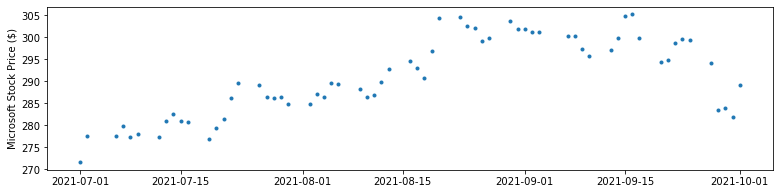

In [6]:
# plotting the Close price
plt.figure(figsize=(13,3))
plt.scatter(data.Date, data.Close, marker='.')
plt.ylabel('Microsoft Stock Price ($)')
plt.show()

Considering the index number as the feature (x axis), we fit an ordinary (linear) least square model on the data: 

In [7]:
Y = data.Close
X = data.index.values
X = sm.add_constant(X) # the model needs an intercept. So, we add a column of 1s. (Y = AX where A=[a, b], X=[[x],[1]])
X[:5]

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.]])

In [8]:
model1 = sm.OLS(Y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     63.42
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.13e-11
Time:                        01:47:32   Log-Likelihood:                -211.44
No. Observations:                  65   AIC:                             426.9
Df Residuals:                      63   BIC:                             431.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2109      1.559    179.723      0.0

Plot the real data versus the predictions of the linear model:

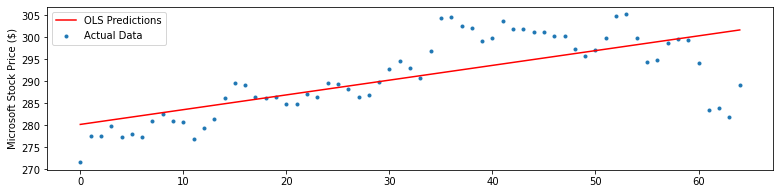

In [9]:
plt.figure(figsize=(13,3))
plt.scatter(data.index, data.Close, marker='.', label='Actual Data')
plt.plot(model1.predict(), color='r', label='OLS Predictions')
plt.ylabel('Microsoft Stock Price ($)')
plt.legend()
plt.show()

As can be seen, a line cannot be a good representation of the data. So, we try again using a polynomial model as follwos:

In [10]:
Y = data.Close
X = data.index.values
X = np.column_stack((X, X**2, X**3)) # adding x^2 and x^3
X = sm.add_constant(X) # the model needs an intercept. So, we add a column of 1s. (Y = AX where A=[a, b, c, d], X=[[x^3],[x^2],[x],[1]])
X[:5]

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [11]:
model2 = sm.OLS(Y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     113.7
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           6.09e-25
Time:                        01:47:33   Log-Likelihood:                -172.79
No. Observations:                  65   AIC:                             353.6
Df Residuals:                      61   BIC:                             362.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        277.9075      1.671    166.286      0.0

We plot the actual data versus the new predictions:

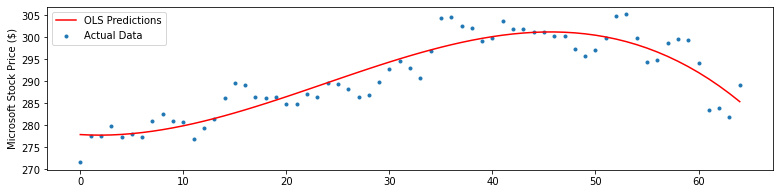

In [12]:
plt.figure(figsize=(13,3))
plt.scatter(data.index, data.Close, marker='.', label='Actual Data')
plt.plot(model2.predict(), color='r', label='OLS Predictions')
plt.ylabel('Microsoft Stock Price ($)')
plt.legend()
plt.show()

As can be seen, the new curve is a better fit for the data. So, we extract the important information about the model:

In [13]:
print('Parameters of the model are (d, c, b, and a for ax^3 + bx^2 + cx + d):\n', model2.params)

Parameters of the model are (d, c, b, and a for ax^3 + bx^2 + cx + d):
 const    277.907453
x1        -0.142578
x2         0.039772
x3        -0.000558
dtype: float64


### OLS non-linear curve but linear in parameters
Here, we consider a part of the data with nonlinear relationship between X and Y:

In [14]:
data = pd.DataFrame(data_full['Close'][:'2021-6-01']).reset_index()
data.head(3)

,Date,Close
0,2021-01-04,217.690002
1,2021-01-05,217.899994
2,2021-01-06,212.250000


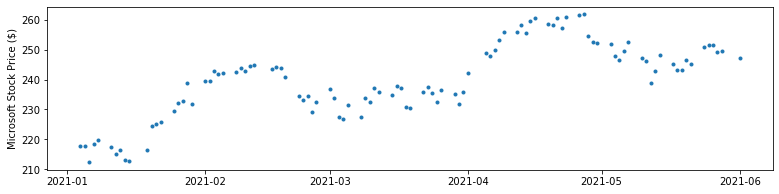

In [15]:
# plotting the Close price
plt.figure(figsize=(13,3))
plt.scatter(data.Date, data.Close, marker='.')
plt.ylabel('Microsoft Stock Price ($)')
plt.show()

We consider some nonlinear features as follows:

In [16]:
Y = data.Close
X = data.index.values
X = np.column_stack((X, np.sin(X/10), (X-5)**2, np.ones(len(X)))) # adding sin(x), (x-5)^2, and 1s for the intercept
X[:5]

array([[ 0.        ,  0.        , 25.        ,  1.        ],
       [ 1.        ,  0.09983342, 16.        ,  1.        ],
       [ 2.        ,  0.19866933,  9.        ,  1.        ],
       [ 3.        ,  0.29552021,  4.        ,  1.        ],
       [ 4.        ,  0.38941834,  1.        ,  1.        ]])

In [17]:
model3 = sm.OLS(Y, X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     123.1
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           2.75e-33
Time:                        01:47:34   Log-Likelihood:                -325.78
No. Observations:                 103   AIC:                             659.6
Df Residuals:                      99   BIC:                             670.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8865      0.074     11.907      0.0

We plot the actual data and the OLS predictions together with the prediction intervals (the confidence intervals around the predictions) (based on wls_prediction_std) as follows:

In [18]:
model3.get_prediction().summary_frame().head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,211.242209,1.837575,207.596062,214.888356,199.104331,223.380087
1,213.018521,1.732789,209.580291,216.456751,200.941472,225.095570
2,214.774476,1.635110,211.530064,218.018888,202.751169,226.797782
3,216.501807,1.545559,213.435083,219.568531,204.525226,228.478388


In the above dataframe: 
- 'mean' is the same as the predictions by the model. 
- 'mean_ci_lower' and 'mean_ci_upper' are the confidence interval boundaries.
- 'obs_ci_lower' & 'obs_ci_upper' are the prediction interval boundaries.

The prediction interval predicts in what range a future individual observation will fall, while a confidence interval shows the likely range of values associated with some statistical parameter of the data, such as the population mean. **

Confidence intervals are for mean predictions. Unlike prediction interval, confidence interval doesn’t tell us a range of target values an observation can take. Instead, it tells us a range of target mean values. Here’s an example interpretation: There is 90% probability that mean target value for records with feature values same as record 287 will fall somewhere between 140.9452 and 151.3897.
While both intervals are centred around the prediction, the standard errors for prediction intervals is bigger than the one for confidence intervals. As a result, prediction intervals are wider than confidence intervals. ***

** https://towardsdatascience.com/how-confidence-and-prediction-intervals-work-4592019576d8#:~:text=The%20prediction%20interval%20predicts%20in,such%20as%20the%20population%20mean.

*** https://towardsdatascience.com/prediction-intervals-in-python-64b992317b1a

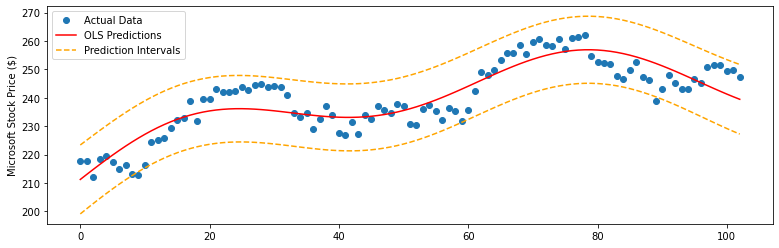

In [19]:
CL_low = model3.get_prediction().summary_frame()['obs_ci_lower'] 
CL_up = model3.get_prediction().summary_frame()['obs_ci_upper'] 

plt.figure(figsize=(13,4))
plt.plot(data.Close, 'o', label='Actual Data')
plt.plot(model3.predict(), '-', color='r', label='OLS Predictions')
plt.plot(CL_low, '--', color='orange', label='Prediction Intervals')
plt.plot(CL_up, '--', color='orange')
plt.ylabel('Microsoft Stock Price ($)')
plt.legend()
plt.show()

We also take a look at the confidence intervals boundaries as follows:

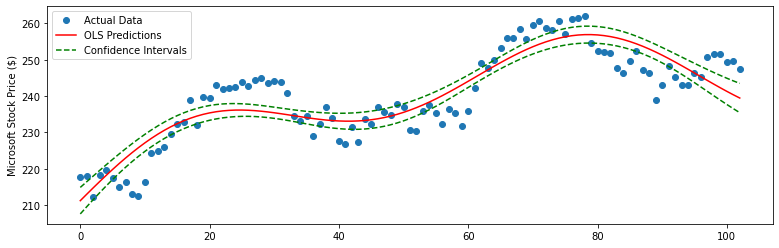

In [20]:
CL_low = model3.get_prediction().summary_frame()['mean_ci_lower'] 
CL_up = model3.get_prediction().summary_frame()['mean_ci_upper'] 

plt.figure(figsize=(13,4))
plt.plot(data.Close, 'o', label='Actual Data')
plt.plot(model3.predict(), '-', color='r', label='OLS Predictions')
plt.plot(CL_low, '--', color='green', label='Confidence Intervals')
plt.plot(CL_up, '--', color='green')
plt.ylabel('Microsoft Stock Price ($)')
plt.legend()
plt.show()

## 2) Generalized Least Squares (GLS)

We use the Longley dataset which is a time series data.

The Longley dataset contains various US macroeconomic variables that are known to be highly collinear. It has been used to appraise the accuracy of least squares routines.

Number of Observations - 16
Number of Variables - 6
Variable name definitions::

- TOTEMP - Total Employment
- GNPDEFL - GNP deflator
- GNP - GNP
- UNEMP - Number of unemployed
- ARMED - Size of armed forces
- POP - Population
- YEAR - Year (1947 - 1962)

https://www.statsmodels.org/dev/datasets/generated/longley.html#:~:text=The%20Longley%20dataset%20contains%20various,accuracy%20of%20least%20squares%20routines.

In [21]:
data = sm.datasets.longley.load()
data.exog.head(5) # statsmodels is using 'endog' and 'exog' as names for the data. 'exog' is x variable and 'endog' is y variable (target).

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [22]:
data.endog.head(5) # values for Total Employment

0    60323.0
1    61122.0
2    60171.0
3    61187.0
4    63221.0
Name: TOTEMP, dtype: float64

In [23]:
data.exog.describe()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,101.681250,387698.437500,3193.312500,2606.687500,117424.000000,1954.500000
std,10.791553,99394.937795,934.464247,695.919604,6956.101561,4.760952
min,83.000000,234289.000000,1870.000000,1456.000000,107608.000000,1947.000000
25%,94.525000,317881.000000,2348.250000,2298.000000,111788.500000,1950.750000
50%,100.600000,381427.000000,3143.500000,2717.500000,116803.500000,1954.500000
75%,111.250000,454085.500000,3842.500000,3060.750000,122304.000000,1958.250000
max,116.900000,554894.000000,4806.000000,3594.000000,130081.000000,1962.000000


We add a constant value to the dataset:

In [24]:
data.exog = sm.add_constant(data.exog)
data.exog.head(5)

,const,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,1.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,1.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,1.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,1.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


We assume that the data is heteroskedastic.

In [25]:
model4 = sm.OLS(data.endog, data.exog).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           4.98e-10
Time:                        01:47:36   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

c:\Users\MIO\.conda\envs\envtf\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


We then get the residuals of the OLS fit:

In [26]:
model4_resid = model4.resid

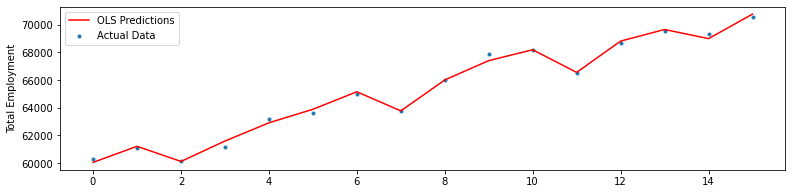

In [27]:
# plotting the actual versus the predicted total employment
plt.figure(figsize=(13,3))
plt.scatter(data.endog.index, data.endog, marker='.', label='Actual Data')
plt.plot(model4.predict(), color='r', label='OLS Predictions')
plt.ylabel('Total Employment')
plt.legend()
plt.show()

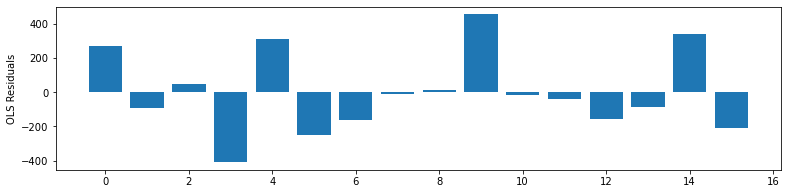

In [28]:
# plotting the residuals
plt.figure(figsize=(13,3))
plt.bar(data.endog.index, model4_resid)
plt.ylabel('OLS Residuals')
plt.show()

We assume that the residuals follow an autoregressive process of order one (AR(p=1)). So, we fit an OLS on the 1-lagged residuals: 

In [29]:
model4_resid_fit = sm.OLS(np.asarray(model4_resid)[1:], sm.add_constant(np.asarray(model4_resid)[:-1])).fit()
print(model4_resid_fit.tvalues[1])
print(model4_resid_fit.pvalues[1])

-1.4390229839705615
0.17378444788898745


However, the assumption about AR(1)-followed residuals is not strong, we obtain the rho. rho is a consistent estimator of the correlation of the residuals from an OLS fit of the longley data. It is assumed that this is the true rho of the AR process data.

In [30]:
rho = model4_resid_fit.params[1] # coeff for the lagged value
rho

-0.3634294908762582

As we know, an AR(1) process means that near-neighbors have a stronger relation so we can give this structure by using a toeplitz matrix.
This is a matrix in which each descending diagonal from left to right is constant. Toeplitz matrices are used to model systems that posses shift invariant properties. The property of shift invariance is evident from the matrix structure itself. 

https://www.gaussianwaves.com/2014/02/polynomials-convolution-and-toeplitz-matrices-connecting-the-dots/

In [31]:
from scipy.linalg import toeplitz

toeplitz(range(5))

array([[0, 1, 2, 3, 4],
       [1, 0, 1, 2, 3],
       [2, 1, 0, 1, 2],
       [3, 2, 1, 0, 1],
       [4, 3, 2, 1, 0]])

In [32]:
order = toeplitz(range(len(model4_resid)))
order

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6,  7],
       [ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5,  6],
       [10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4,  5],
       [11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3,  4],
       [12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0,  1,  2,  3],
       [13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,

In [33]:
sigma = rho ** order  # The array or scalar sigma is the weighting matrix of the covariance.
model5 = sm.GLS(data.endog, data.exog, sigma=sigma).fit()
print(model5.summary())

                            GLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.998
Model:                            GLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     724.0
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           1.48e-11
Time:                        01:47:37   Log-Likelihood:                -107.50
No. Observations:                  16   AIC:                             229.0
Df Residuals:                       9   BIC:                             234.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.798e+06   6.71e+05     -5.663      0.0

c:\Users\MIO\.conda\envs\envtf\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


As can be seen, the coefficients are slightly different from the OLS results.

We obtain the residuals:

In [34]:
model5_resid = model5.resid

We compare the absolute values of the residuals in both cases of OLS and GLS:

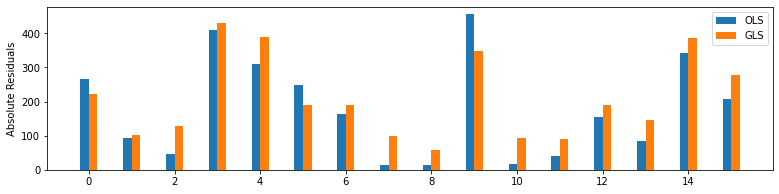

In [35]:
# plotting the residuals
plt.figure(figsize=(13,3))
plt.bar(data.endog.index-0.1, abs(model4_resid), width=0.2, label='OLS')
plt.bar(data.endog.index+0.1, abs(model5_resid), width=0.2, label='GLS')
plt.ylabel('Absolute Residuals')
plt.legend()
plt.show()

Since our assumption about AR(1) for residuals is probably not true, the exact rho is not known. In case that we are sure about the autocorrolation of the residuals, GLS can be very helpful.

We can also use the GLSAR model with lag of 1 to obtain the similar results of the above GLS. However, the results might be slightly different due to the numerical differences in the algorithms.

In [36]:
model6 = sm.GLSAR(data.endog, data.exog, 1).fit()
print(model6.summary())

                           GLSAR Regression Results                           
Dep. Variable:                 TOTEMP   R-squared:                       0.996
Model:                          GLSAR   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     295.2
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           6.09e-09
Time:                        01:47:38   Log-Likelihood:                -102.04
No. Observations:                  15   AIC:                             218.1
Df Residuals:                       8   BIC:                             223.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.468e+06   8.72e+05     -3.979      0.0

c:\Users\MIO\.conda\envs\envtf\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


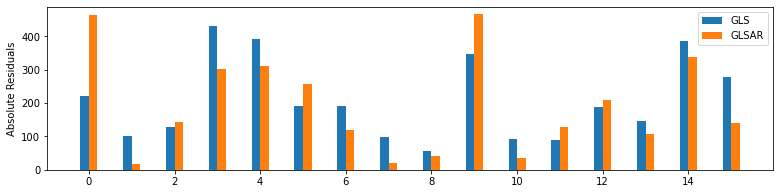

In [37]:
# plotting the residuals
plt.figure(figsize=(13,3))
plt.bar(data.endog.index-0.1, abs(model5_resid), width=0.2, label='GLS')
plt.bar(data.endog.index+0.1, abs(model6.resid), width=0.2, label='GLSAR')
plt.ylabel('Absolute Residuals')
plt.legend()
plt.show()

---------------------
#### END